**Author:** Max Aragón <br>
**Affiliation:** Université Bretagne Sud <br>
**Course:** HPC for Big Data <br>
**Date:** 2022-09-30

***

<div class="alert alert-block alert-success">
<h2><center>Description of the Storm EVent ImageRy (SEVIR) dataset </center></h2>

# Content

* [Introduction](#chapter1)

* [Data access and download](#chapter2)

* [Applications](#chapter3)

* [Preprocessing](#chapter4)

* [References](#chapter5)


<div class="alert alert-block alert-info"> 
<h3><center>Introduction </center><a id="chapter1"></a></h3>

SEVIR was presented on the 34th Conference on Neural Information Processing Systems (NeurIPS 2020) in Vancouver, Canada [(Veillette et al., 2020)](#cite2). It consists of a carefullly selected, annotated, and spatiotemporally aligned compilation of data from the Geostationary Environmental Satellite System (GOES-16) and the Next Generation Radar (NEXRAD) system. Specifically, SEVIR merges GOES and NEXRAD imagery to provide a coherent dataset primarly useful for meteorological applications using deep learning, namely, precipitation nowcasting and synthetic radar image generation. The problems SEVIR solve are twofold, first, the original GOES and NEXRAD datasets are too vast and complex for model training, therefore downsampling is needed. Second, fusing satellite and radar data into a common grid is a non trivial task that requires specialised datatsets which often lack within the community of atmospheric data scientists, thus SEVIR has been crafted as a "machine-learning-ready" dataset relevant for developing new algorithms and benchmarking existing ones. SEVIR is a terabyte size dataset consisting of 12,000 events. Each event is a 4-hour lenght sequence in a 5-min temporal resolution, covering 384 x 384 km sampled across the United States (US). An event is a collection of 5 image types:

<div>
<center><img src="https://www.researchgate.net/publication/362011771/figure/fig1/AS:1177943090962432@1657854926385/The-Storm-EVent-ImagRy-SEVIR-dataset-contains-over-10-000-spatially-and-temporally.ppm" width="800"/>
 </center></div>




| Sensor | Data key | Description | Spatial Resolution |  Patch Size |  Time step |
|:--------:|:------:|:-------------:|:--------------------:|:---------:|:-----------:|
|  GOES-16 C02 0.64 $\mu m$  |`vis`  |  Visible channel |  0.5 km | 768x768 | 5 minute   |
|  GOES-16 C09 6.9 $\mu m$  |`ir069`   |  Infrared channel (Water Vapor) | 2 km | 192 x 192  | 5 minutes         |
|  GOES-16 C13 10.7 $\mu m$  |`ir107`   |  Infrared channel (Window) | 2 km | 192 x 192  | 5 minutes         |
|  Vertically Integrated Liquid (VIL) |`vil`   |  NEXRAD radar mosaic of VIL | 1 km | 384 x 384  | 5 minutes         |
|  GOES-16 GLM flashes |`lght`   |  Detections of inter cloud and cloud to ground lightning events | 8 km | N/A  | Continuous   |

SEVIR data spans between 2017 and 2019. The events are divided into two types - Random and Storms. The selection of random samples was based on the availablity of data with high Vertically Integrated Liquid (VIL) intensity pixels to avoid oversampling events without precipitation. Whereas the storm events were chosen by pairing the data with the Storm Events Database from the [National Center for Environmental Information (NCEI)](https://www.ncdc.noaa.gov/stormevents/). The NCEI database describes extreme weather events in terms of categories (flood, flash flood, hail, heavy rain, thunderstorm, lightning, and tornadoes).

<div class="alert alert-block alert-info"> 
<h3><center>Data access and download</center><a id="chapter2"></a></h3>

SEVIR can be downloaded from the [Registry of Open Data on AWS](https://registry.opendata.aws/sevir/). The following commands are useful for accessing the dataset:

* Listing the files: aws s3 ls s3://sevir/
* Listing data files: aws s3 ls s3://sevir/data/
* Download data example: aws s3 cp s3://sevir/data/vis/2018/'SEVIR_VIS_STORMEVENTS_2018_1201_1231.h5' /Users/max/UBS/SEVIR/data/

SEVIR contains two main files, a catalog and the data. The catalog is a csv file including metadata of every single event, such as image size, projection, coordinates, time in UTC, percentage of missing values, etc. The data folder contains subdirectories with each image type organised by year in multiple HDF5 files. 

In [10]:
import pandas as pd
import numpy as np
catalog = pd.read_csv('CATALOG.csv', low_memory=False)
catalog.head()[:2].T

,0,1
id,R18032505027684,R18032505027677
file_name,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5
file_index,0,1
img_type,vis,vis
time_utc,2018-03-25 05:00:00,2018-03-25 05:00:00
minute_offsets,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...
episode_id,NaN,NaN
event_id,NaN,NaN
event_type,NaN,NaN
llcrnrlat,33.216708,33.084309


## HDF5 data format

The Hierarchical Data Format version 5 (HDF5) is binary cross platform, open-source format to store, manage, and process large amounts of scientific data. It can be manipulated using the [h5py python package](https://www.h5py.org). 

In [29]:
f = h5py.File('SEVIR_VIS_STORMEVENTS_2018_1201_1231.h5','r'); list(f.keys())

['id', 'vis']

Event ID: b'S796560'
Image shape: (768, 768, 49)


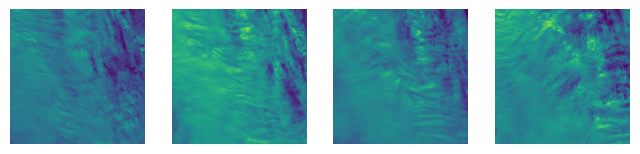

In [32]:
import os
import h5py 
import matplotlib.pyplot as plt
 
file_index = 0
with h5py.File('SEVIR_VIS_STORMEVENTS_2018_1201_1231.h5','r') as hf:
    event_id = hf['id'][file_index]
    vis      = hf['vis'][file_index]
    
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

fig,axs=plt.subplots(1,4,figsize=(8,8))
axs[0].imshow(vis[:,:,10])
axs[1].imshow(vis[:,:,20])
axs[2].imshow(vis[:,:,30])
axs[3].imshow(vis[:,:,40])
for ax in axs:
    ax.axis('off')

plt.show()

<div class="alert alert-block alert-info"> 
<h3><center>Applications</center><a id="chapter3"></a></h3>

According to the original publication this dataset has applications on various machine learning weather problems, including:
    
1. $\textbf{Future prediction:}$ Sequence prediction given a number of frames relevant for precipitation nowcasting (fig 1).

<div>
<center><img src="https://www.researchgate.net/profile/Daniele-Nerini/publication/333045581/figure/fig4/AS:811373663633408@1570457964027/Comparison-of-three-30-min-stochastic-nowcasts-produced-with-the-FFT-noise-generators.ppm" width="550"/>
 </center></div>

<center> Fig 1. Radar nowcasting (Pulkkinen et al., 2019) </center>

2. $\textbf{Image-to-Image translation:}$ Image generation given an input image, for example synthetic weather radar image (fig 2).

<div>
<center><img src="https://journals.ametsoc.org/view/journals/atot/35/12/full-jtech-d-18-0010.1-f3.jpg" width="450"/>
 </center></div>
 
<center> Fig 2. Synthetic radar image generation (Veillette et al., 2018) </center>


3. $\textbf{Optical flow:}$ Generation of wind fields given a sequence of frames, also knwon as atmospheric motion vectors (fig 3).

<div>
<center><img src="https://journals.ametsoc.org/view/journals/atot/34/12/full-jtech-d-17-0110.1-f2.jpg" width="300"/>
 </center></div>
 
<center> Fig 3. Flow field estimation (Bechini et al., 2017) </center>



4. $\textbf{Classification}$ Storm type classification 

<div>
<center><img src="https://agupubs.onlinelibrary.wiley.com/cms/asset/6e2c4bde-3b86-41c1-b9ef-00ee6c90fe2f/ess2937-fig-0009-m.png" width="280"/>
 </center></div>
 
 <center> Fig 4. Severe storm classification (Molina et al., 2021) </center>




5. $\textbf{Super-Resolution:}$ Learn a mapping function to downsample images.


<div>
<center><img src="https://journals.ametsoc.org/view/journals/atot/37/12/full-jtech-d-20-0074.1-f4.jpg" width="450"/>
 </center></div>
 
 <center> Fig 5. Super-resolution comparison of CNN with bicubic interpolation (Geiss & Hardin 2020) </center>

Although most of the applications have already been listed by the authors I believe this dataset can extended. Specifically, the pipeline for the generation of a machine learning dataset can be implemented for fusing the data in near real time while adding other in-situ parameters with further applications in:

1. Machine-learning based parameterisations for operational numerical weather prediction (e.g. emulations, physics informed models)
2. Data driven weather nowcasting beyond precipitation (e.g. cloud cover, radiation, temperature)
3. Deep convection detection for early warning systems

<div class="alert alert-block alert-info"> 
<h3><center>Potential preprocessing</center><a id="chapter4"></a></h3>

The dataset has been heavily preprocessed and harmonised. However, further preprocessing could include:

* Automated extension of the dataset (2020, 2021, 2022)
* Anomaly detection for guaranteeing data quality.
* Anomaly detection for adding noise to a relatively "clean dataset"

<div class="alert alert-block alert-info"> 
<h3><center>References</center><a id="chapter5"></a></h3>


Bechini, R., & Chandrasekar, V. (2017). An enhanced optical flow technique for radar nowcasting of precipitation and winds. Journal of Atmospheric and Oceanic Technology, 34(12), 2637-2658.

Enos, G. R., Reagor, M. J., Henderson, M. P., Young, C., Horton, K., Birch, M., & Rigetti, C. (2021). Synthetic weather radar using hybrid quantum-classical machine learning. arXiv preprint arXiv:2111.15605.

Geiss, A., & Hardin, J. C. (2020). Radar super resolution using a deep convolutional neural network. Journal of Atmospheric and Oceanic Technology, 37(12), 2197-2207.

Molina, M. J., Gagne, D. J., & Prein, A. F. (2021). A benchmark to test generalization capabilities of deep learning methods to classify severe convective storms in a changing climate. Earth and Space Science, 8(9), e2020EA001490.

Pulkkinen, S., Nerini, D., Pérez Hortal, A. A., Velasco-Forero, C., Seed, A., Germann, U., & Foresti, L. (2019). Pysteps: an open-source Python library for probabilistic precipitation nowcasting (v1. 0). Geoscientific Model Development, 12(10), 4185-4219 <a id="cite1">

Veillette, M. S., Hassey, E. P., Mattioli, C. J., Iskenderian, H., & Lamey, P. M. (2018). Creating synthetic radar imagery using convolutional neural networks. Journal of Atmospheric and Oceanic Technology, 35(12), 2323-2338.
    
Veillette, M., Samsi, S., & Mattioli, C. (2020). Sevir: A storm event imagery dataset for deep learning applications in radar and satellite meteorology. Advances in Neural Information Processing Systems, 33, 22009-22019 <a id="cite2">